In [1]:
import numpy as np
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import matplotlib.pyplot as plt

# This is a heading
## This is a subheading
### This is a subsubheading
This is some text. This is a nicely formatted `variable_name`. Here is an equation $y = \int x(t)~dt$.

You can put your text here

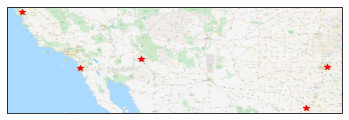

In [2]:
ax = plt.axes(projection=ccrs.PlateCarree()) # make the axes with the projection of our choice

latitudes  = [33.448,    29.424,   32.716,  32.777,   37.338];
longitudes = [-112.074, -98.494, -117.161, -96.797, -121.886];

background = cimgt.GoogleTiles(style='street')
ax.add_image(background, 8) # add a background image at zoom level 8

plt.plot(longitudes, latitudes,
         linestyle='None', # No lines
         color='red', marker='*',
         transform=ccrs.PlateCarree(),
         ) # draw an asterisk at each location

plt.show()

In [3]:
ax = plt.axes(projection=ccrs.PlateCarree()) # make the axes with the projection of our choice

lon_vector = np.linspace(150,152,101)
lat_vector = np.linspace(-35,-33,101)

lon2D,lat2D = np.meshgrid(lon_vector,lat_vector) # turn the 1D vectors into 2D arrays

# Specify weights for each data point.
concentration = np.random.rand(101,101)

# Add the base map
# background = cimgt.Stamen('toner') # get premade terrain map tiles
# background = cimgt.GoogleTiles(style='satellite')
background = cimgt.GoogleTiles(style='street')
# background = cimgt.GoogleTiles(style='terrain')
ax.add_image(background, 8) # add a background image at zoom level 8

# Create the geographic density plot, specifying the colors used with the plot.
filled_contours = ax.contourf(lon2D,
                              lat2D,
                              concentration,
                              transform=ccrs.PlateCarree(),
                              alpha=0.2)

# Add a colourbar to the contours
plt.colorbar(filled_contours)
plt.show()

Shell is not a LinearRing
Shell is not a LinearRing


ValueError: Null geometry supports no operations

<Figure size 432x288 with 2 Axes>

In [4]:
centre = [-33.8907927,151.1930733]
dlon = 0.5
dlat = 0.5
lon_vector = np.linspace(centre[1] - dlon, centre[1] + dlon, 101)
lat_vector = np.linspace(centre[0] - dlat, centre[0] + dlat, 101)

In [5]:
# how to loop through two dimensions and end up with a list of lists of the right shape
list_1 = []
list_2 = []

for i in range(5):
    for j in range(3):
        list_1.append(j)
    list_2.append(list_1)
    list_1 = []

print(list_2)

[[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]


In [6]:
def distance(lat1, lon1, lat2, lon2):
# Haversine formula: https://en.wikipedia.org/wiki/Haversine_formula
   r = 6371 # radius of the earth in km
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2 - lat1)
   delta_lambda = np.radians(lon2 - lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
   return res

distance(-33.8877373,151.1693116,-33.8842538,151.193807) # 99 bikes stanmore to broadway is about 2.3 km

2.294066794698407

In [5]:
import sys
sys.executable

'/Users/benjymarks/miniconda3/bin/python'

Shell is not a LinearRing


TypeError: an integer is required

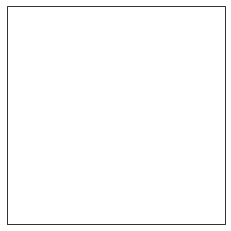

In [4]:
# Create a Stamen terrain background instance.
stamen_terrain = cimgt.Stamen('terrain-background')

fig = plt.figure()

# Create a GeoAxes in the tile's projection.
ax = fig.add_subplot(1, 1, 1, projection=stamen_terrain.crs)

# Limit the extent of the map to a small longitude/latitude range.
ax.set_extent([-22, -15, 63, 65], crs=ccrs.Geodetic())

# Add the Stamen data at zoom level 8.
ax.add_image(stamen_terrain, 8)

# Add a marker for the Eyjafjallajökull volcano.
ax.plot(-19.613333, 63.62, marker='o', color='red', markersize=12,
        alpha=0.7, transform=ccrs.Geodetic())

# Use the cartopy interface to create a matplotlib transform object
# for the Geodetic coordinate system. We will use this along with
# matplotlib's offset_copy function to define a coordinate system which
# translates the text by 25 pixels to the left.
geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=-25)

# Add text 25 pixels to the left of the volcano.
ax.text(-19.613333, 63.62, 'Eyjafjallajökull',
        verticalalignment='center', horizontalalignment='right',
        transform=text_transform,
        bbox=dict(facecolor='sandybrown', alpha=0.5, boxstyle='round'))
plt.show()